# Understand The data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pickle
sns.set()
credit_data=pd.read_csv('../data/credit.csv')
print('Dimensionality before deleting duplicate values:', credit_data.shape)

# Removing duplicate rows if any
credit_data=credit_data.drop_duplicates()
print('Dimensionality After deleting duplicate values:', credit_data.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
credit_data.head(10)

Dimensionality before deleting duplicate values: (1000, 17)
Dimensionality After deleting duplicate values: (1000, 17)


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [2]:
credit_data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

# Looking at the distribution of Target variable

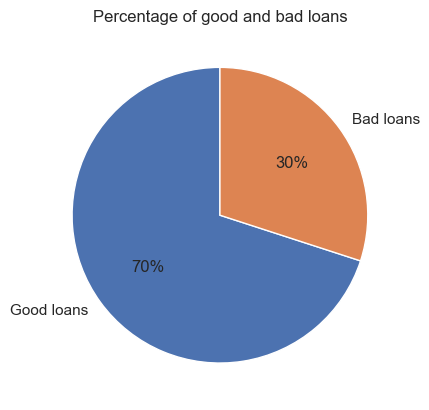

In [3]:
good_bad_per=round(((credit_data.default.value_counts()/credit_data.default.count())*100))
good_bad_per
plt.pie(good_bad_per,labels=['Good loans', 'Bad loans'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans');
plt.savefig('../results/Percentage_of_good_and_bad_loans.png')

# Basic Data Exploration

In [4]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
# Looking at the descriptive statistics of the data
credit_data.describe(include='all')

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [6]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
credit_data.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                   6
amount                  921
savings_balance           5
employment_duration       5
percent_of_income         4
years_at_residence        4
age                      53
other_credit              3
housing                   3
existing_loans_count      4
job                       4
dependents                2
phone                     2
default                   2
dtype: int64

# Visual Exploratory Data Analysis
Categorical variables: Bar plot

In [7]:
def PlotBarCharts(inpData, colsToPlot):    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=3, ncols=5, figsize=(20,20))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        row_num = int(plotNumber/5)
        column_num = int(plotNumber%5)
        subplt = sns.countplot(x=inpData[colName],ax=subPlot[row_num][column_num])
        subplt.set_xticklabels(subplt.get_xticklabels(), rotation=40, ha="right")
    plt.delaxes(subPlot[-1][-1])
    plt.delaxes(subPlot[-1][-2])
    plt.tight_layout()
    plt.savefig('../results/visual_exploratory_data_analysis_categorical.png')

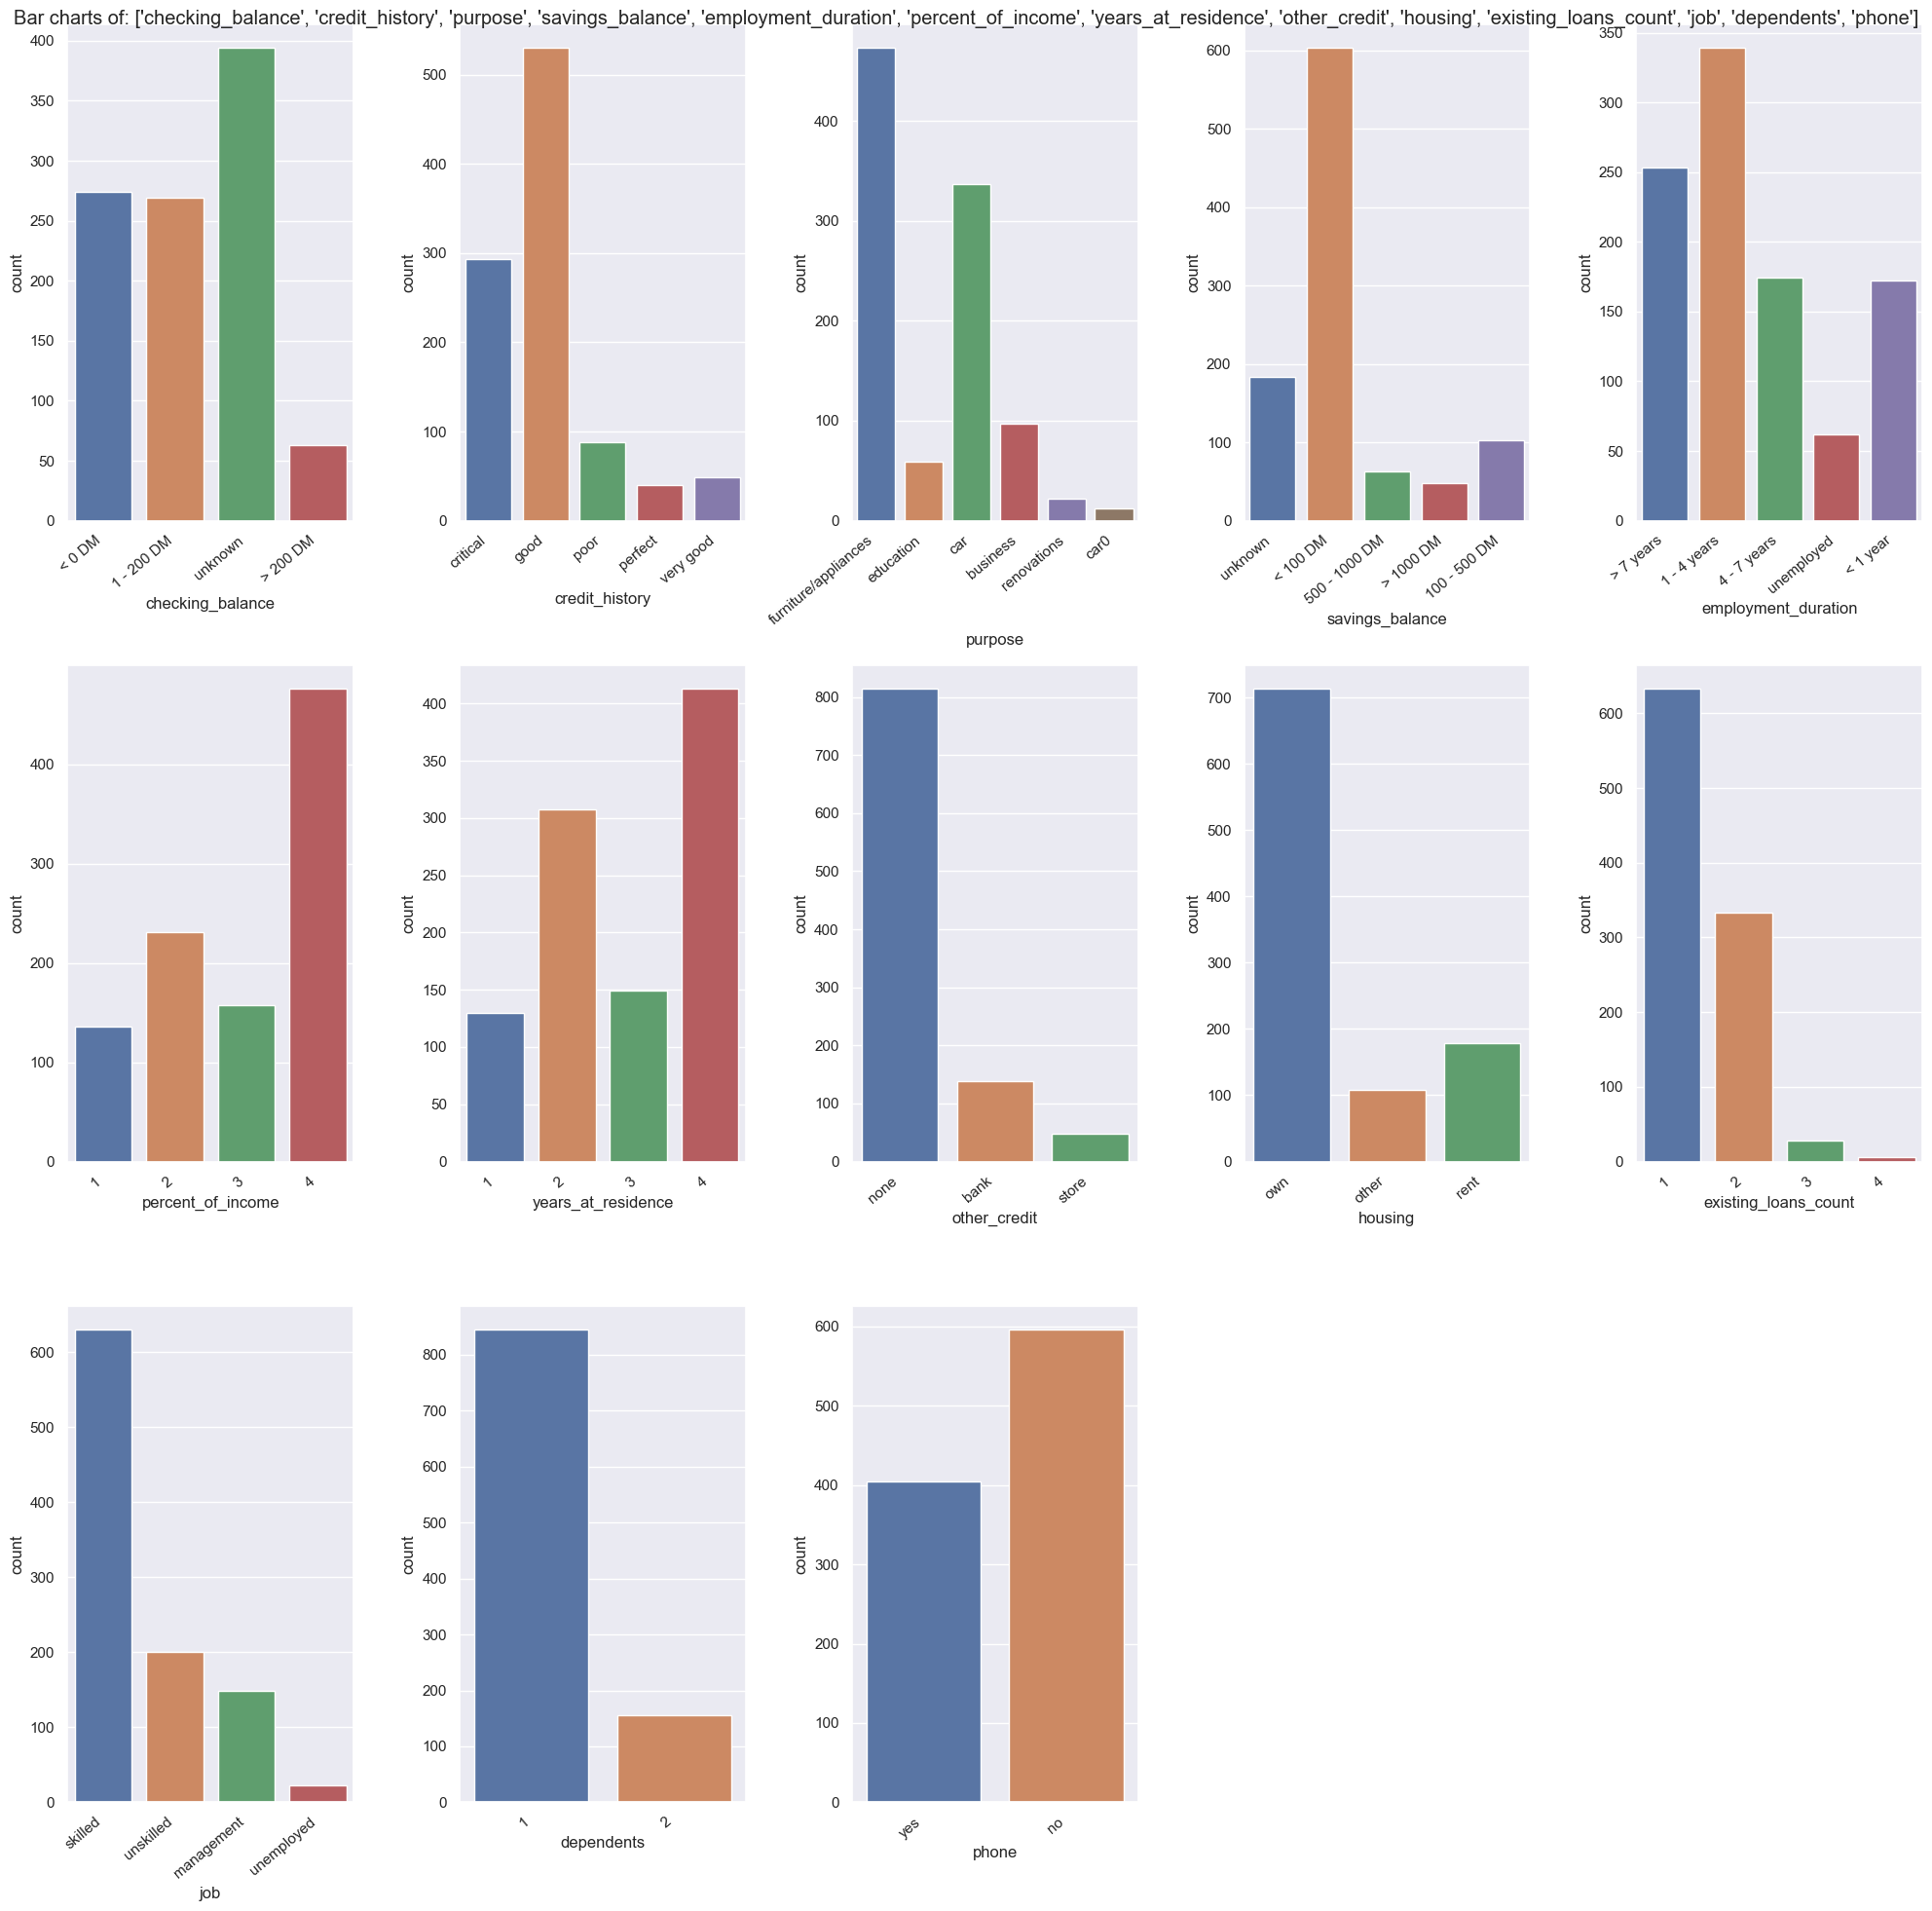

In [8]:
#####################################################################
# Calling the function for bar chart
PlotBarCharts(inpData=credit_data, 
              colsToPlot=['checking_balance', 'credit_history', 'purpose','savings_balance','employment_duration','percent_of_income', 'years_at_residence', 'other_credit','housing','existing_loans_count','job', 'dependents', 'phone'])

Continuous variables: Histogram

In [9]:
def PlotHistCharts(inpData, colsToPlot):    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(1,3, figsize=(20,5))
    fig.suptitle('Histogram charts of: '+ str(colsToPlot))
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        subplt = sns.histplot(data=inpData, x=colName, kde=True,ax=subPlot[plotNumber])
    plt.tight_layout()
    plt.savefig('../results/visual_exploratory_data_analysis_continuous.png')


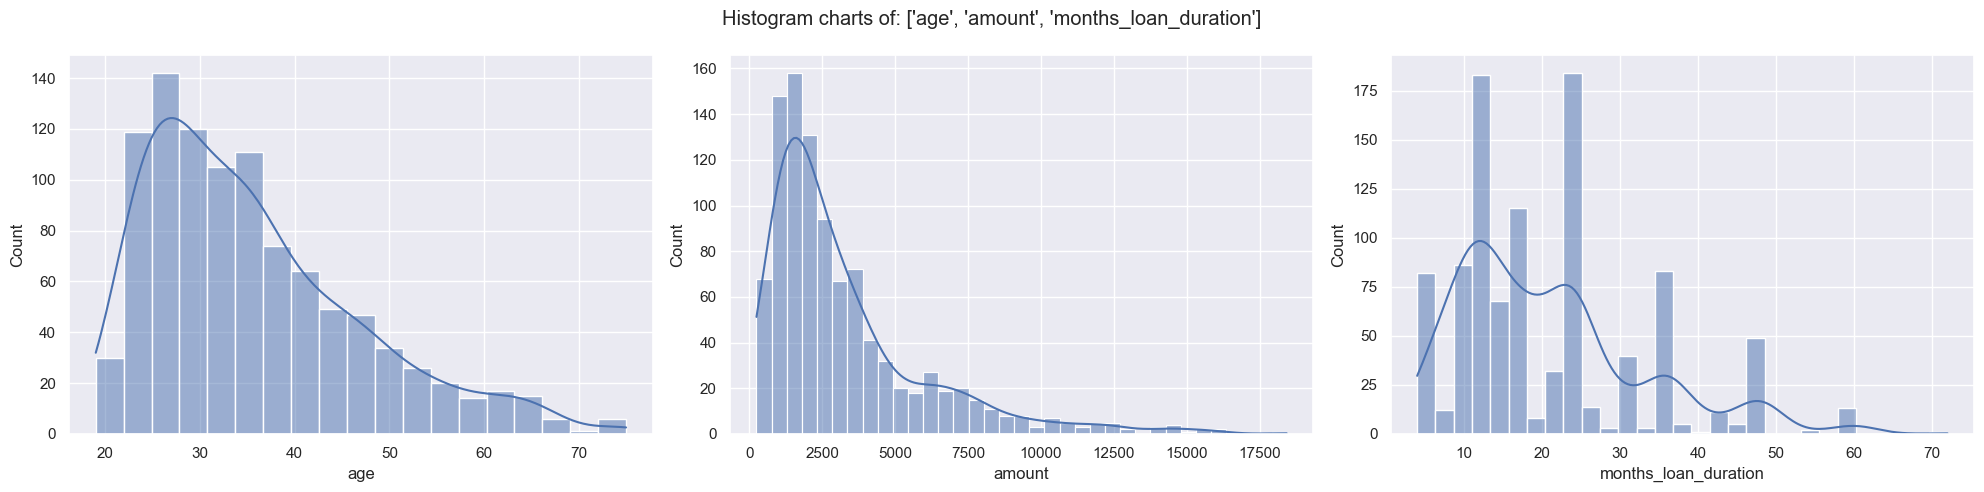

In [10]:
#####################################################################
# Calling the function for histogram chart
PlotHistCharts(inpData=credit_data, 
              colsToPlot=['age','amount','months_loan_duration'])

Handling outliers (unusually extreme data points) and Managing missing values in the dataset

In [11]:
credit_data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

No missing values in this data!

Relationship exploration: Categorical Vs Continuous -- Box Plots

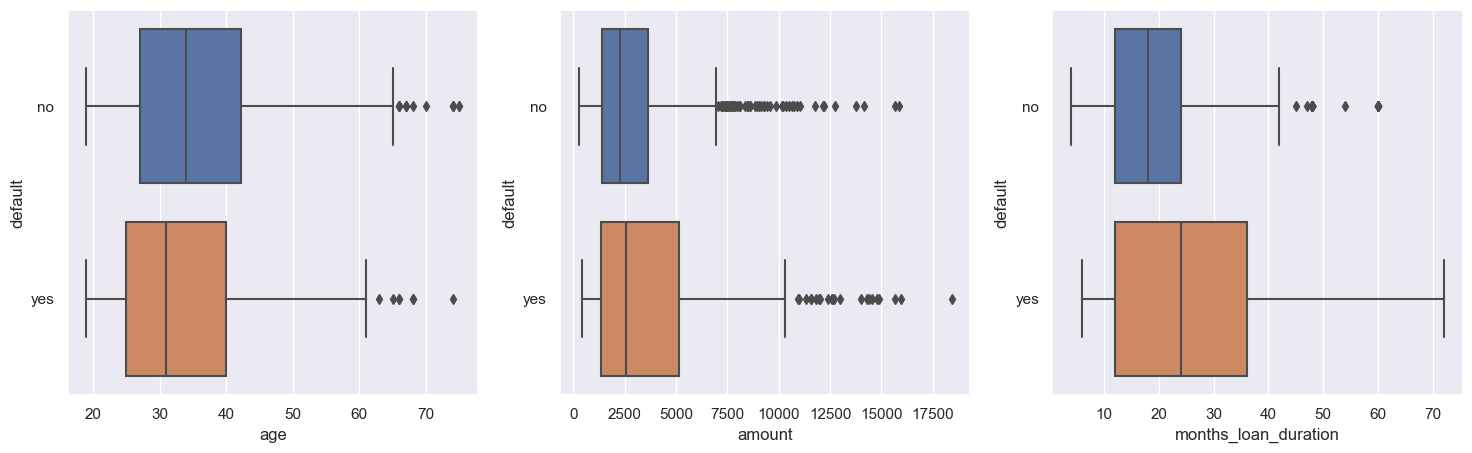

In [12]:
# Box plots for Categorical Target Variable "default" and continuous predictors
continuous_cols_list=['age','amount', 'months_loan_duration']
fig, plot_canvas=plt.subplots(nrows=1, ncols=len(continuous_cols_list), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "default"
for predictor_col , i in zip(continuous_cols_list, range(len(continuous_cols_list))):
    sns.boxplot(data=credit_data, x=predictor_col, y="default",ax=plot_canvas[i])
plt.savefig('../results/relationship_exploration_continuous_vs_categorical.png')

In [13]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [14]:
# Calling the function to check which categorical variables are correlated with target
continuous_variables=['age', 'amount','months_loan_duration']
FunctionAnova(inpData=credit_data, TargetVariable='default', ContinuousPredictorList=continuous_variables)

##### ANOVA Results ##### 

age is correlated with default | P-Value: 0.003925339398278295
amount is correlated with default | P-Value: 8.797572373533373e-07
months_loan_duration is correlated with default | P-Value: 6.488049877187189e-12


['age', 'amount', 'months_loan_duration']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [15]:
def PlotCrossTabCharts(inpData, colsToPlot):    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=3, ncols=5, figsize=(20,20))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.4)
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        row_num = int(plotNumber/5)
        col_num = int(plotNumber%5)
        CrossTabResult=pd.crosstab(index=inpData[colName], columns=inpData['default'])
        subplt = CrossTabResult.plot(kind="bar", stacked=True, rot=0,ax=subPlot[row_num][col_num])
        subplt.set_xticklabels(subplt.get_xticklabels(), rotation=40, ha="right")
    plt.delaxes(subPlot[-1][-1])
    plt.delaxes(subPlot[-1][-2])
    plt.savefig('../results/relationship_exploration_categorical_vs_categorical.png')

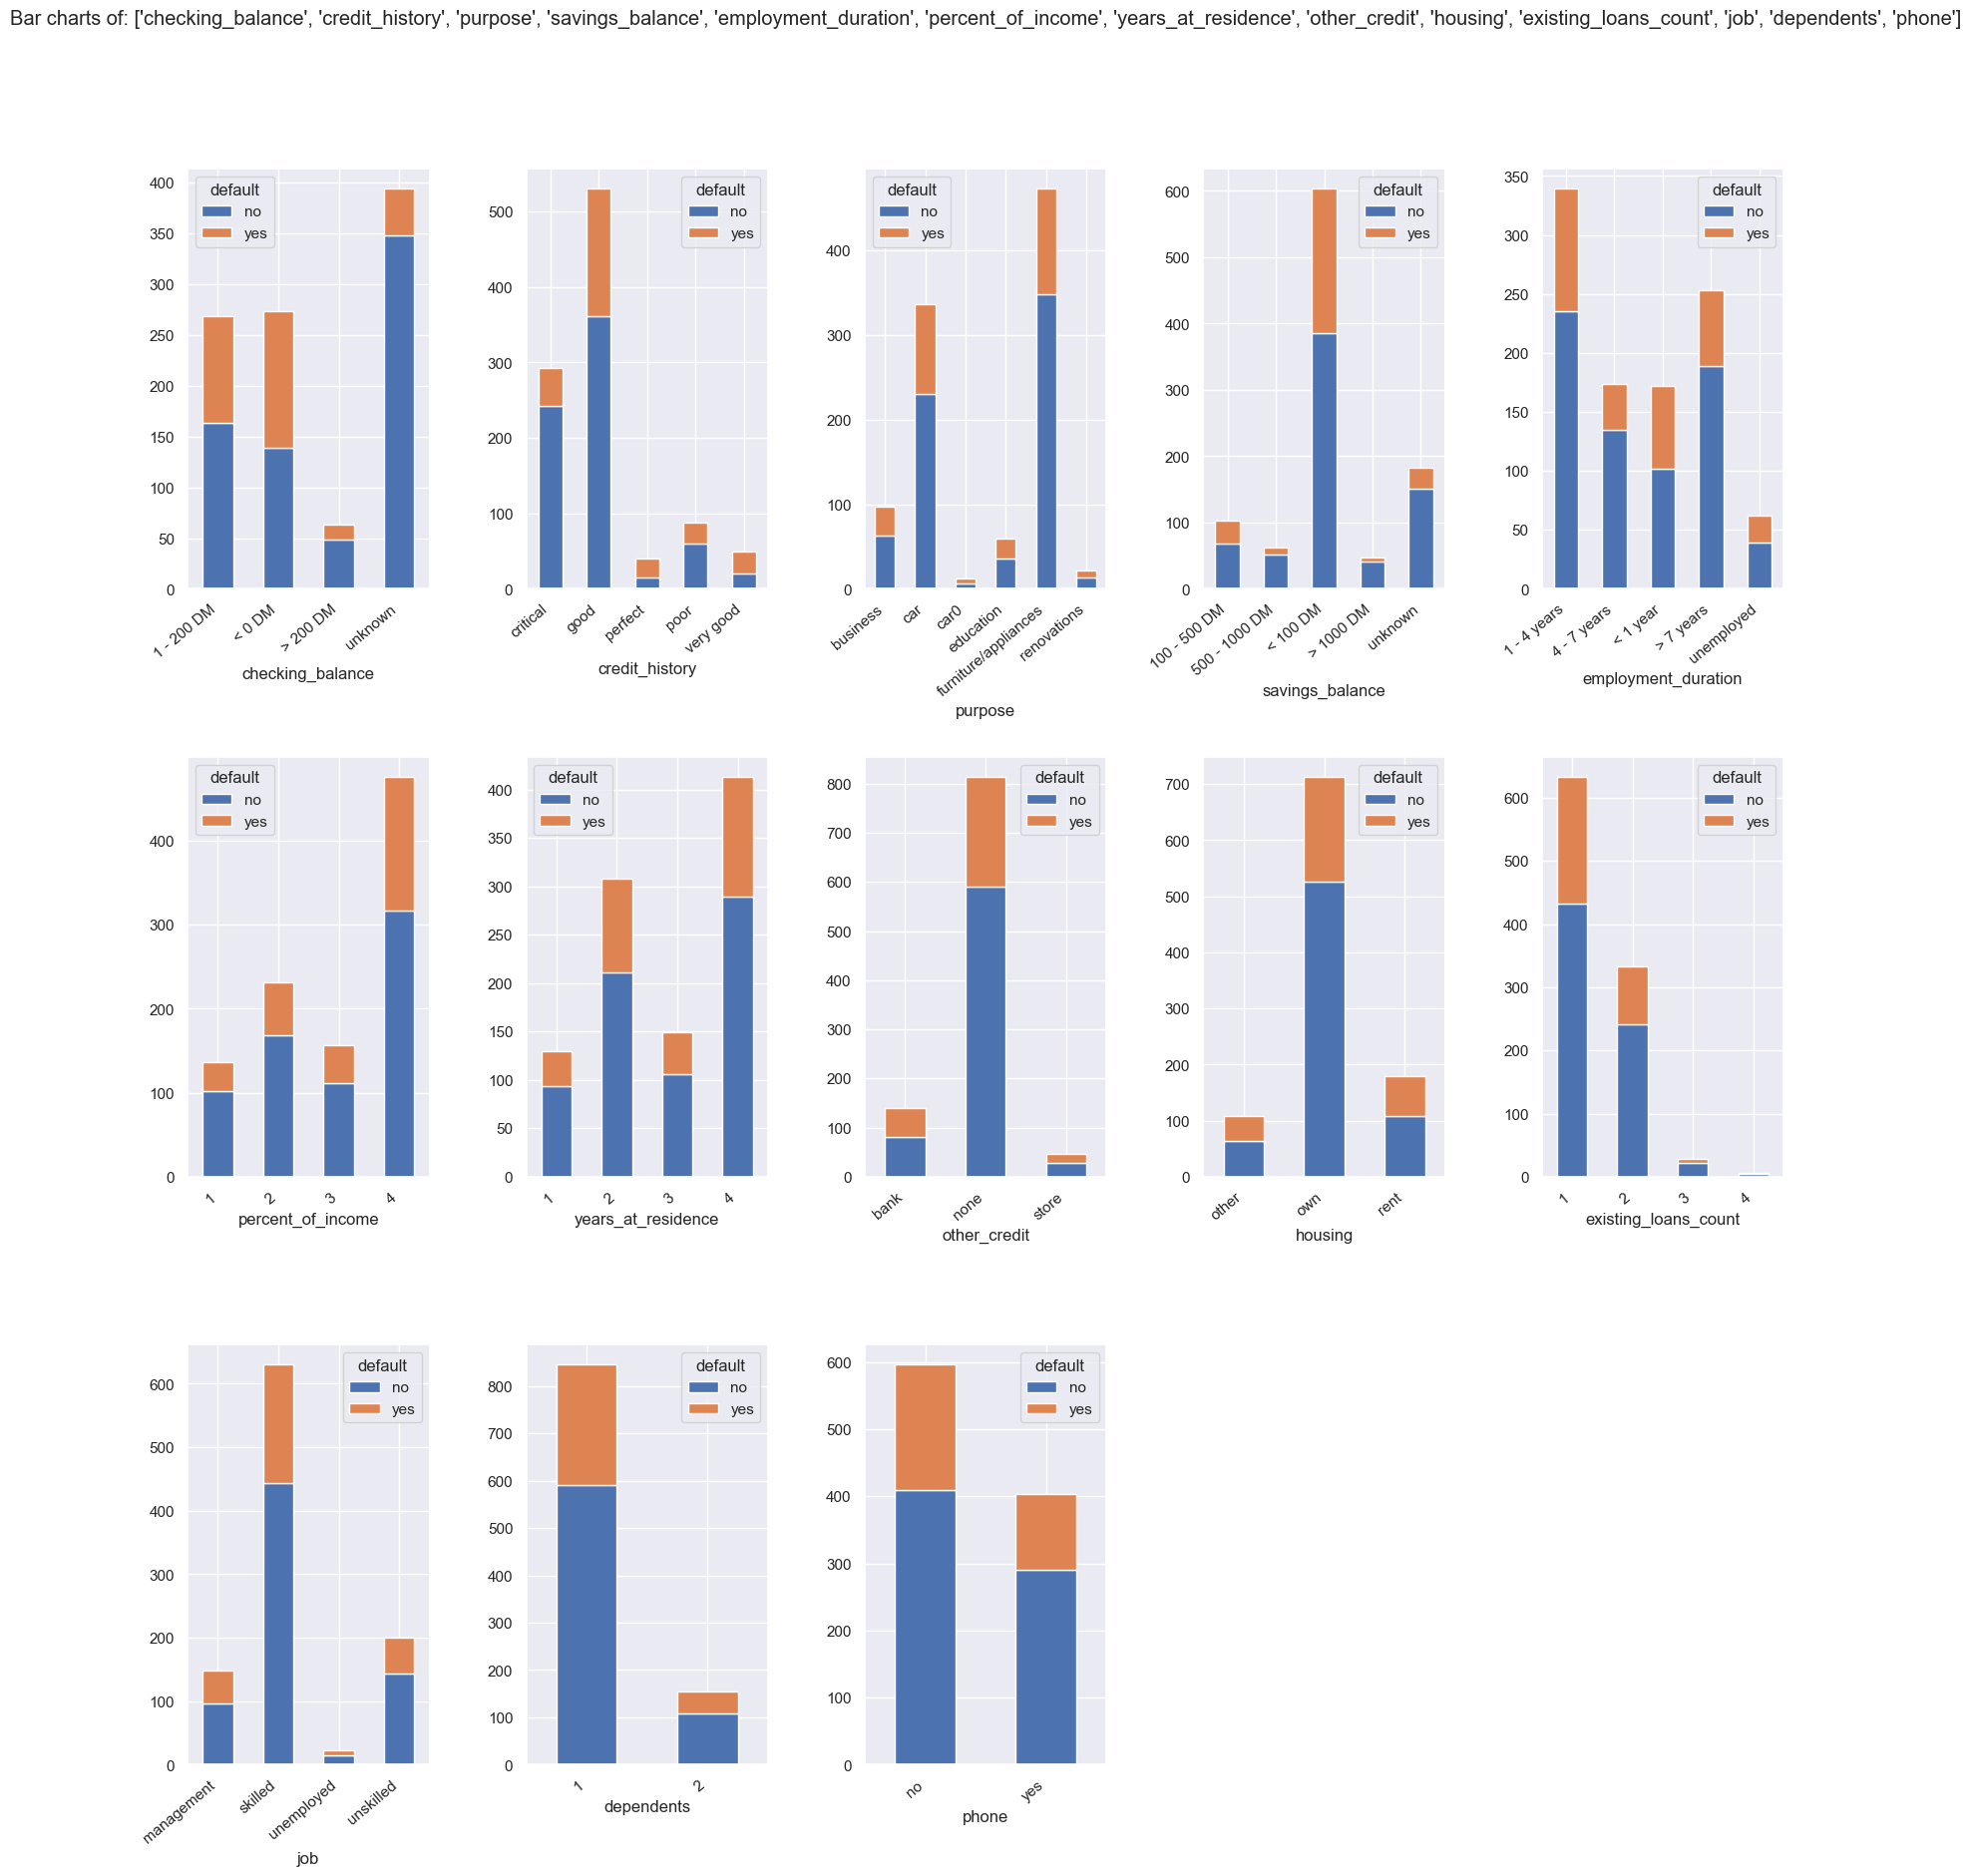

In [16]:
#####################################################################
# Calling the function for bar chart on CrossTab
PlotCrossTabCharts(inpData=credit_data, 
              colsToPlot=['checking_balance', 'credit_history', 'purpose','savings_balance','employment_duration','percent_of_income', 'years_at_residence', 'other_credit','housing','existing_loans_count','job', 'dependents', 'phone'])

In [17]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [18]:
# Calling the function
CategoricalVariables=['checking_balance', 'credit_history', 'purpose','savings_balance','employment_duration',
                     'percent_of_income', 'years_at_residence', 'other_credit','housing', 'existing_loans_count', 'job', 'dependents', 'phone']

FunctionChisq(inpData=credit_data, 
              TargetVariable='default',
              CategoricalVariablesList= CategoricalVariables)

checking_balance is correlated with default | P-Value: 1.2189020722893755e-26
credit_history is correlated with default | P-Value: 1.2791872956751013e-12
purpose is NOT correlated with default | P-Value: 0.14488884731934595
savings_balance is correlated with default | P-Value: 2.7612142385682596e-07
employment_duration is correlated with default | P-Value: 0.0010454523491402541
percent_of_income is NOT correlated with default | P-Value: 0.1400333122128481
years_at_residence is NOT correlated with default | P-Value: 0.8615521320413175
other_credit is correlated with default | P-Value: 0.0016293178186473534
housing is correlated with default | P-Value: 0.00011167465374597664
existing_loans_count is NOT correlated with default | P-Value: 0.4451440800083001
job is NOT correlated with default | P-Value: 0.5965815918843431
dependents is NOT correlated with default | P-Value: 1.0
phone is NOT correlated with default | P-Value: 0.27887615430357426


['checking_balance',
 'credit_history',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing']

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'checking_balance', 'credit_history', 'savings_balance', 'employment_duration', 'other_credit', 'housing'

In [19]:
SelectedColumns=['checking_balance','credit_history','savings_balance','employment_duration','other_credit',"housing",
 'age', 'amount', 'months_loan_duration']

# Selecting final columns
DataForML=credit_data[SelectedColumns]
DataForML.head()

,checking_balance,credit_history,savings_balance,employment_duration,other_credit,housing,age,amount,months_loan_duration
0,< 0 DM,critical,unknown,> 7 years,none,own,67,1169,6
1,1 - 200 DM,good,< 100 DM,1 - 4 years,none,own,22,5951,48
2,unknown,critical,< 100 DM,4 - 7 years,none,own,49,2096,12
3,< 0 DM,good,< 100 DM,4 - 7 years,none,other,45,7882,42
4,< 0 DM,poor,< 100 DM,1 - 4 years,none,other,53,4870,24


Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning

Converting each Ordinal Categorical columns to numeric
Converting Binary nominal Categorical columns to numeric using 1/0 mapping
Converting all other nominal categorical columns to numeric using pd.get_dummies()
Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

Converting Ordinal variables to numeric using business mapping
Based on the information on the column values explanation from the data website

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

"employment_duration" column has ordinal properties.



In [20]:
# Treating the Ordinal variable first
DataForML['employment_duration'].unique()

array(['> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed',
       '< 1 year'], dtype=object)

In [21]:
DataForML['employment_duration'].replace({'unemployed':1, '< 1 year':2, '1 - 4 years':3,'4 - 7 years':4, '> 7 years':5 }, inplace=True)
DataForML.head()

/var/folders/kp/l85k4_0x6hjc43hc1dtz0yhm0000gn/T/ipykernel_36109/1556491946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['employment_duration'].replace({'unemployed':1, '< 1 year':2, '1 - 4 years':3,'4 - 7 years':4, '> 7 years':5 }, inplace=True)


,checking_balance,credit_history,savings_balance,employment_duration,other_credit,housing,age,amount,months_loan_duration
0,< 0 DM,critical,unknown,5,none,own,67,1169,6
1,1 - 200 DM,good,< 100 DM,3,none,own,22,5951,48
2,unknown,critical,< 100 DM,4,none,own,49,2096,12
3,< 0 DM,good,< 100 DM,4,none,other,45,7882,42
4,< 0 DM,poor,< 100 DM,3,none,other,53,4870,24


Converting nominal variables to numeric using get_dummies()

In [22]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML).astype('int')

# Adding Target Variable to the data
DataForML_Numeric['default']=credit_data['default']
DataForML_Numeric.default.replace(('yes', 'no'), (1, 0), inplace=True)

# Printing sample rows
DataForML_Numeric.head()

,employment_duration,age,amount,months_loan_duration,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,...,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,default
0,5,67,1169,6,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,3,22,5951,48,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,1
2,4,49,2096,12,0,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
3,4,45,7882,42,0,1,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
4,3,53,4870,24,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1


In [23]:
# Saving this final data for reference during deployment
DataForML.to_pickle('../data/DataForML.pkl')
DataForML.to_csv('../data/dDataForML.csv')

# Machine Learning: Splitting the data into Training and Testing sample

In [24]:
from sklearn.model_selection import train_test_split
X = DataForML_Numeric.drop("default" ,axis= 1)
y = DataForML_Numeric['default']
Predictors = X.columns.values.tolist()
TargetVariable='default'
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

LogisticRegression(C=1, solver='newton-cg')
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       209
           1       0.62      0.38      0.48        91

    accuracy                           0.74       300
   macro avg       0.70      0.64      0.65       300
weighted avg       0.73      0.74      0.72       300

Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.744      0.70413016 0.73104474 0.73947368 0.72604645 0.7965035
 0.5875     0.73104474 0.75665219 0.78896502]

Final Average Accuracy of the model: 0.73


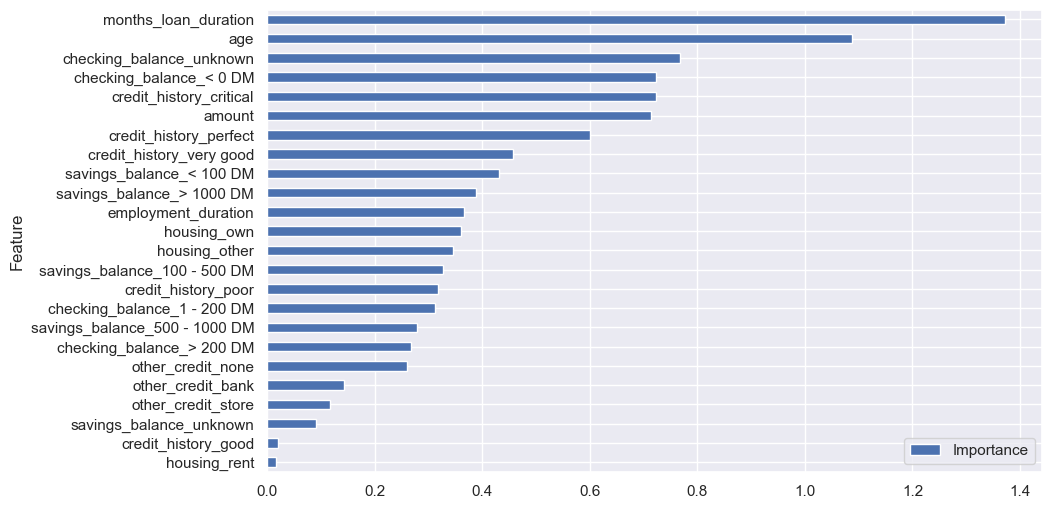

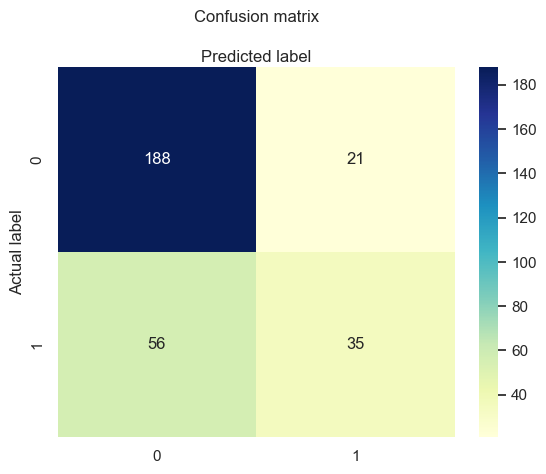

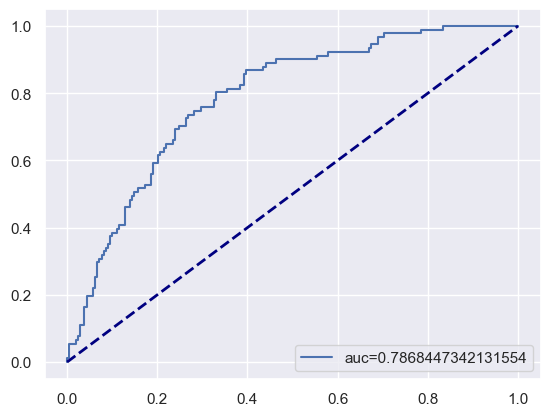

In [25]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# choose parameter Penalty='l2' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
logistic_regression_model = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
filename = '../model/logistic_regression_model.mdl'
pickle.dump(logistic_regression_model, open(filename, 'wb'))
# Printing all the parameters of Logistic Regression
print(logistic_regression_model)
# Creating the model on Training Data
LOGREG=logistic_regression_model.fit(X_train,y_train)
prediction=LOGREG.predict(X_test)
# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOGREG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
logistic_regression_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', logistic_regression_acc)

coefficients = logistic_regression_model.coef_[0]

feature_importance = pd.DataFrame({'Feature': Predictors, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.savefig('../results/logistic_regression_model_feature_importances.png',bbox_inches = 'tight')
plt.show()
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../results/logistic_regression_model_cnf_matrix.png',bbox_inches = 'tight') 
plt.show()

y_pred_proba = LOGREG.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)

plt.savefig('../results/logistic_regression_model_roc.png',bbox_inches = 'tight')
plt.show() 

# Decision Trees

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.73      0.92      0.82       209
           1       0.57      0.23      0.33        91

    accuracy                           0.71       300
   macro avg       0.65      0.58      0.57       300
weighted avg       0.68      0.71      0.67       300

Accuracy of the model on Testing Sample Data: 0.67

Accuracy values for 10-fold Cross Validation:
 [0.74604343 0.65866667 0.74       0.6444608  0.67569892 0.64715447
 0.70133333 0.72       0.70181818 0.68801189]

Final Average Accuracy of the model: 0.69


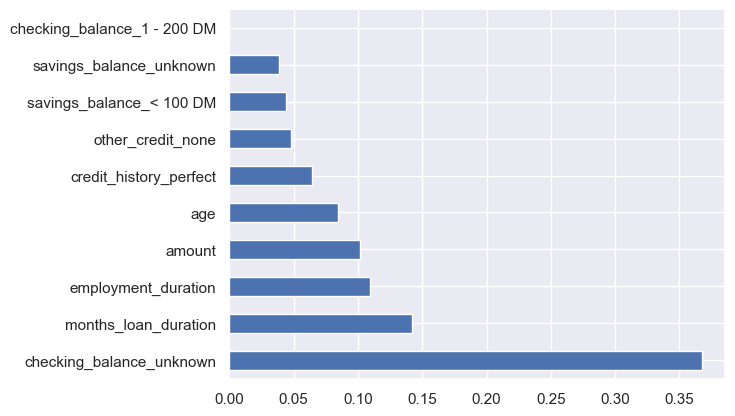

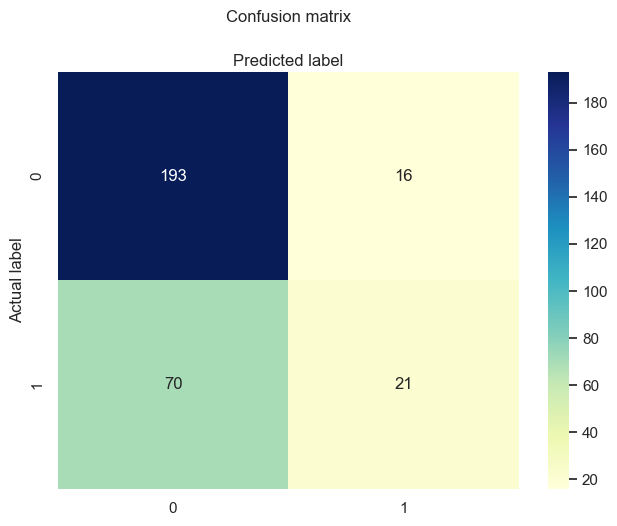

In [26]:
#Decision Trees
from sklearn import tree
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
DTree_model = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Random Forest
print(DTree_model)
# Saving Model
filename = '../model/dicision_trees_model.mdl'
pickle.dump(DTree_model, open(filename, 'wb'))
# Creating the model on Training Data
DTree=DTree_model.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.savefig('../results/dicision_trees_model_feature_importances.png',bbox_inches = 'tight')


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
dicision_trees_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', dicision_trees_acc)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../results/dicision_trees_model_cnf_matrix.png',bbox_inches = 'tight')  

Plotting a Decision Tree

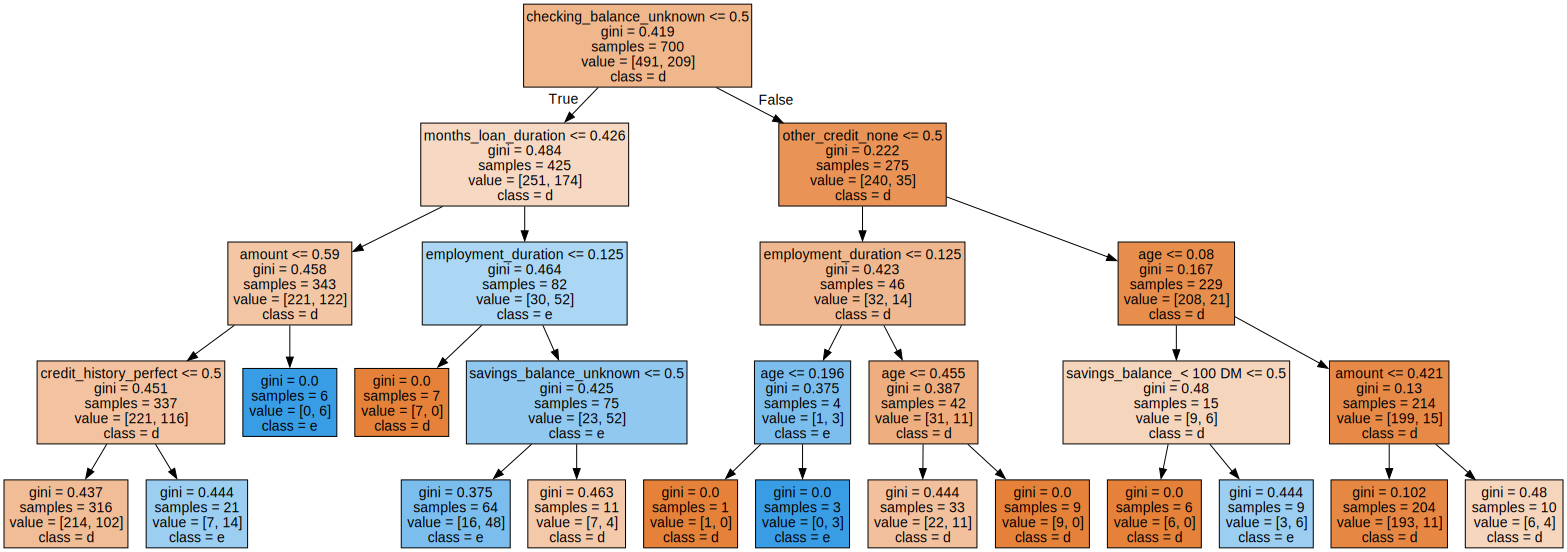

In [27]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(DTree_model, out_file=None, 
                                feature_names=Predictors,  
                                class_names=TargetVariable,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('../results/dicision_trees_model_dtree',format='png', view=False)
graph
# Double click on the graph to zoom in

# Random Forest

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       209
           1       0.67      0.38      0.49        91

    accuracy                           0.76       300
   macro avg       0.72      0.65      0.66       300
weighted avg       0.74      0.76      0.73       300

Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.795594   0.72604645 0.70952831 0.73947368 0.75652174 0.76516129
 0.6458498  0.79897355 0.73944295 0.73944295]

Final Average Accuracy of the model: 0.74


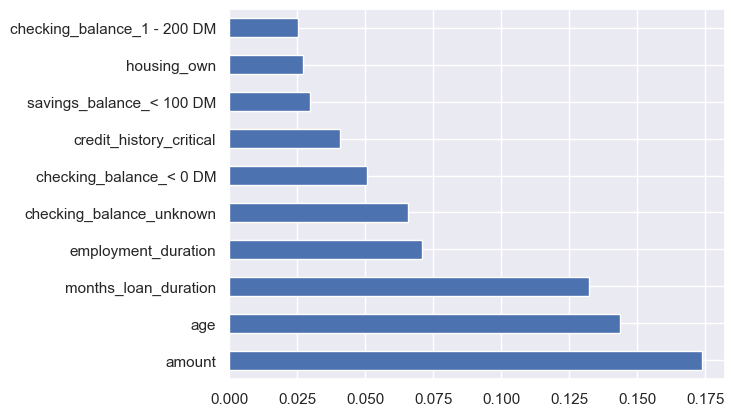

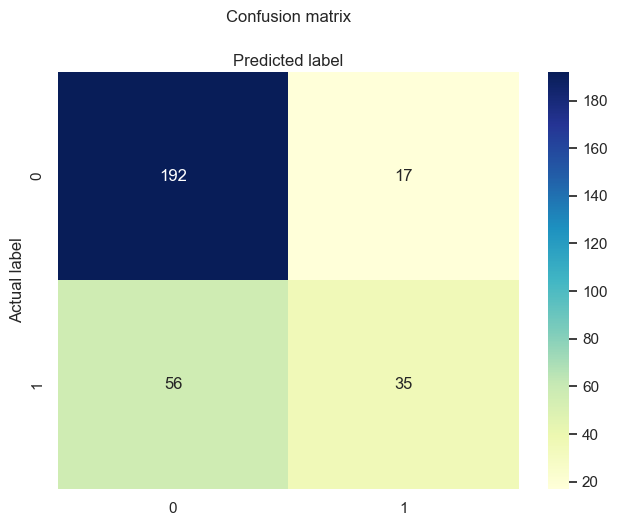

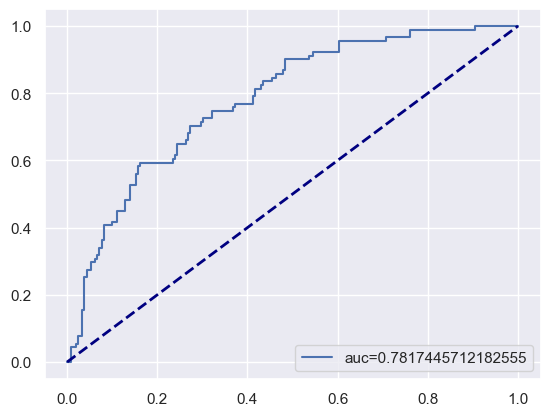

In [28]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# Choose various values of max_depth, n_estimators and criterion for tuning the model
Random_Forest_model = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(Random_Forest_model)
# Saving Model
filename = '../model/random_forest_model_model.mdl'
pickle.dump(Random_Forest_model, open(filename, 'wb'))
# Creating the model on Training Data
RF=Random_Forest_model.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data

print(metrics.classification_report(y_test, prediction))
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
random_forest_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', random_forest_acc)


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.savefig('../results/random_forest_model_feature_importances.png',bbox_inches = 'tight')

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../results/random_forest_model_cnf_matrix.png',bbox_inches = 'tight') 
plt.show() 
y_pred_proba = RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)

plt.savefig('../results/random_forest_model_roc.png',bbox_inches = 'tight')
plt.show() 

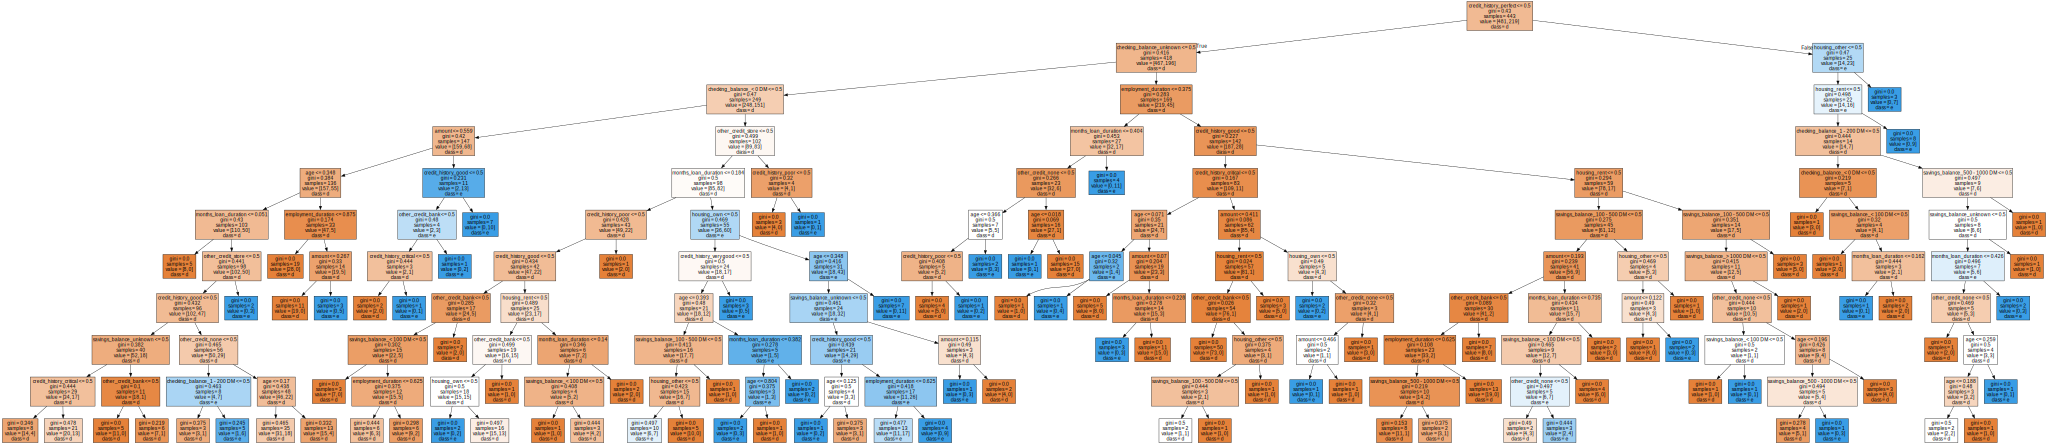

In [29]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(Random_Forest_model.estimators_[4], out_file=None, 
                                feature_names=Predictors,  
                                class_names=TargetVariable,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('../results/random_forest_model_dtree',format='png', view=False)
graph
# Double click on the graph to zoom in

# AdaBoost

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       209
           1       0.66      0.42      0.51        91

    accuracy                           0.76       300
   macro avg       0.72      0.66      0.67       300
weighted avg       0.74      0.76      0.74       300

Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.74294671 0.71225296 0.74604343 0.72604645 0.73947368 0.80460526
 0.72266667 0.75256116 0.68221388 0.67569892]

Final Average Accuracy of the model: 0.73


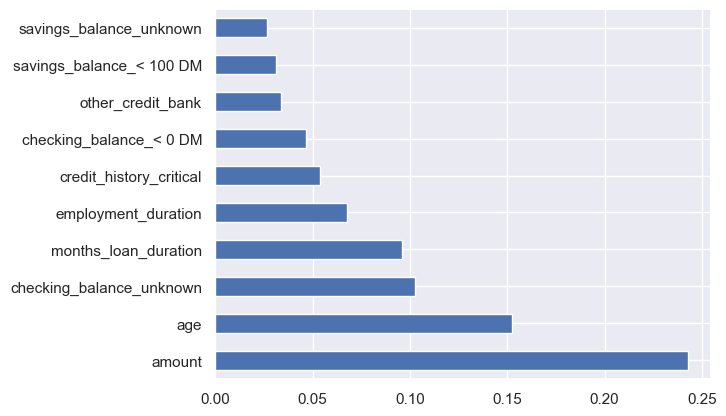

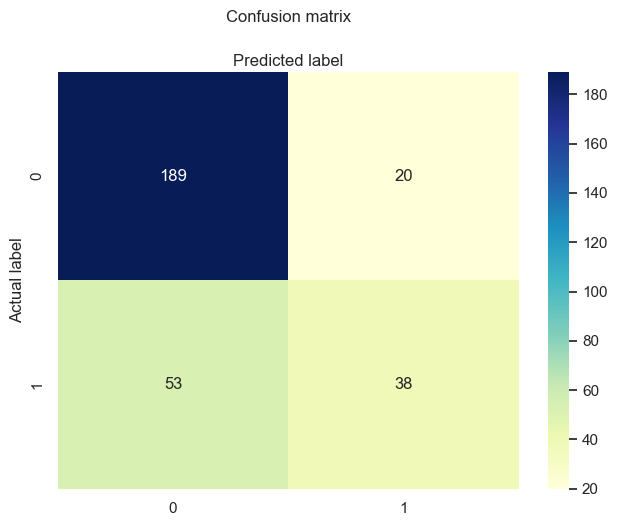

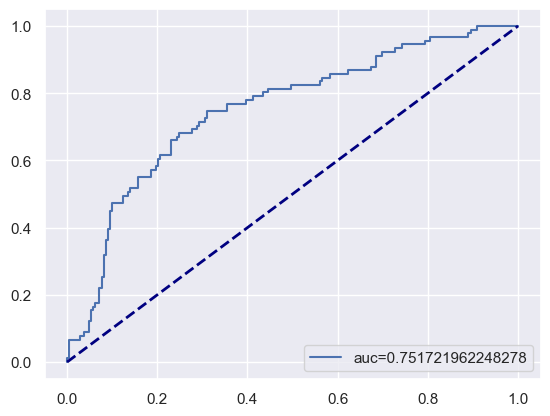

In [30]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
Ada_Boost_model = AdaBoostClassifier(n_estimators=200, estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(Ada_Boost_model)
# Saving Model
filename = '../model/ada_boost_model_model.mdl'
pickle.dump(Ada_Boost_model, open(filename, 'wb'))
# Creating the model on Training Data
AB=Ada_Boost_model.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
# Printing the Overall Accuracy of the model
F1_Score_ada_boost=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
ada_boost_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', ada_boost_acc)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.savefig('../results/ada_boost_model_feature_importances.png',bbox_inches = 'tight')

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 
plt.savefig('../results/ada_boost_model_cnf_matrix.png',bbox_inches = 'tight') 
plt.show()
y_pred_proba = AB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)

plt.savefig('../results/ada_boost_model_roc.png',bbox_inches = 'tight')
plt.show() 

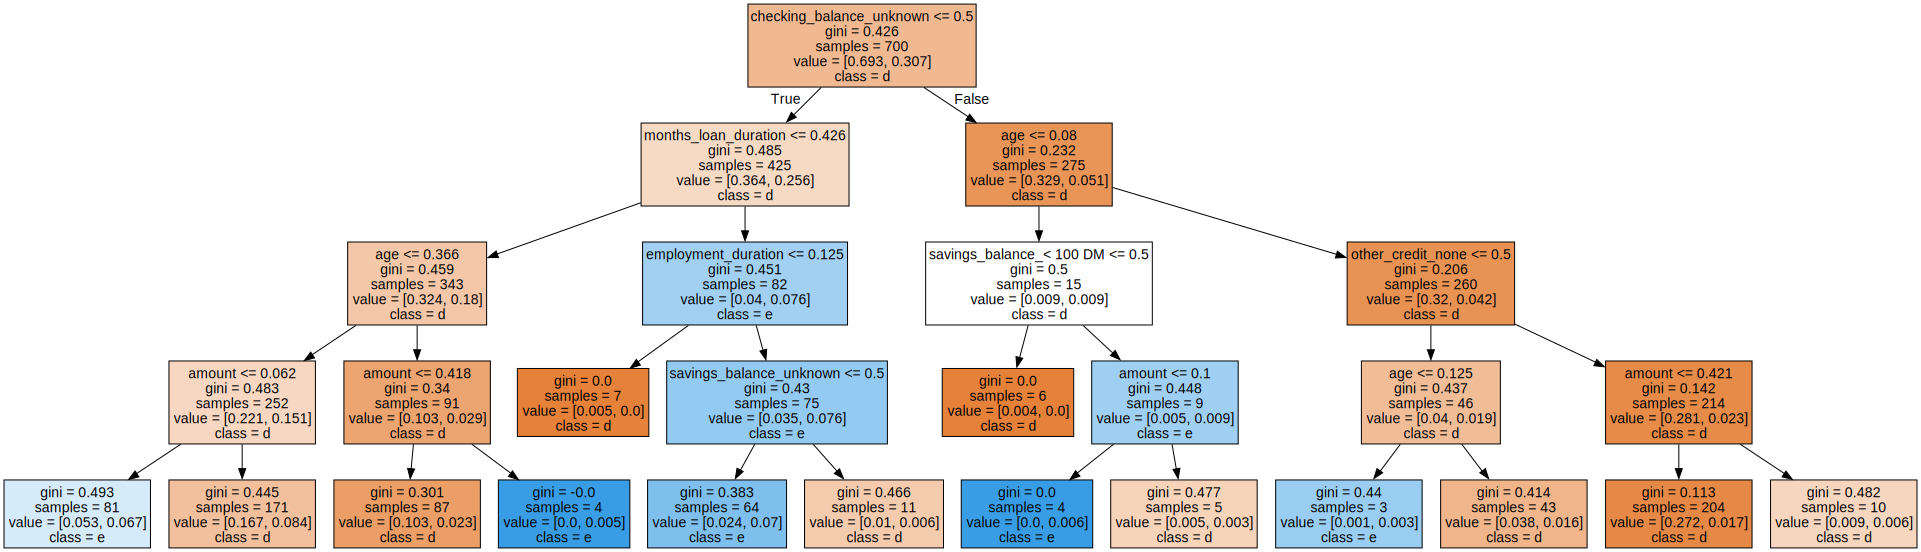

In [31]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(Ada_Boost_model.estimators_[4], out_file=None, 
                                feature_names=Predictors,  
                                class_names=TargetVariable,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render('../results/ada_boost_model_dtree',format='png', view=False)
graph
# Double click on the graph to zoom in

# XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       209
           1       0.62      0.37      0.47        91

    accuracy                           0.74       300
   macro avg       0.69     

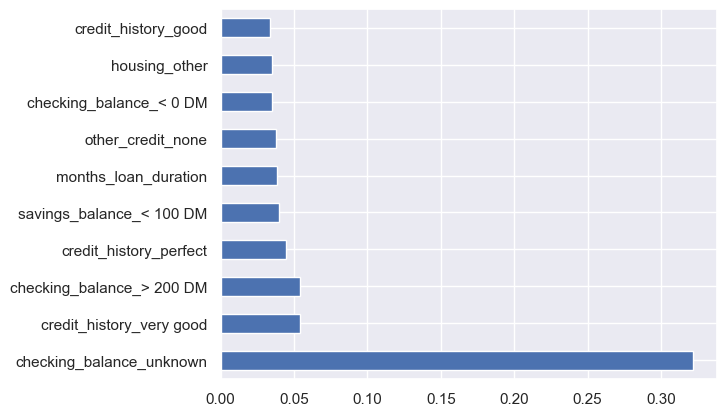

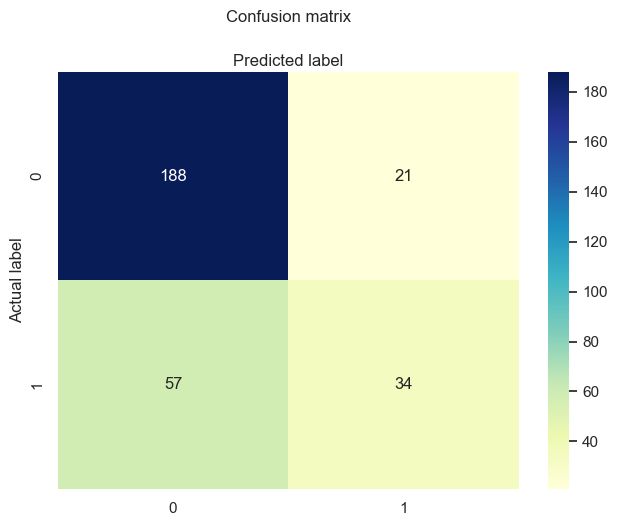

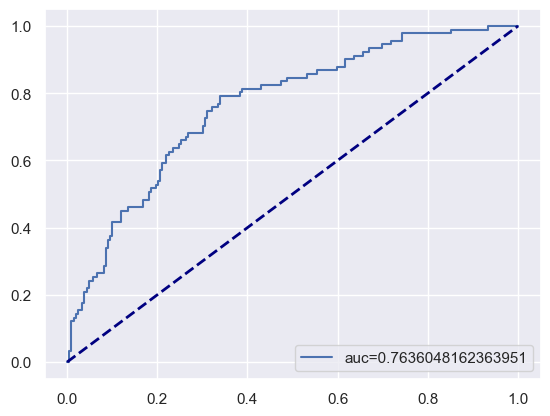

In [32]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics

XGB_model=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(XGB_model)
# Saving Model
filename = '../model/xgb_model_model_model.mdl'
pickle.dump(XGB_model, open(filename, 'wb'))
# Creating the model on Training Data
XGB=XGB_model.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
xgb_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', xgb_acc)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.savefig('../results/xgb_model_feature_importances.png',bbox_inches = 'tight')


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../results/xgb_model_cnf_matrix.png',bbox_inches = 'tight') 
plt.show() 
y_pred_proba = XGB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)

plt.savefig('../results/xgb_model_roc.png',bbox_inches = 'tight')
plt.show() 

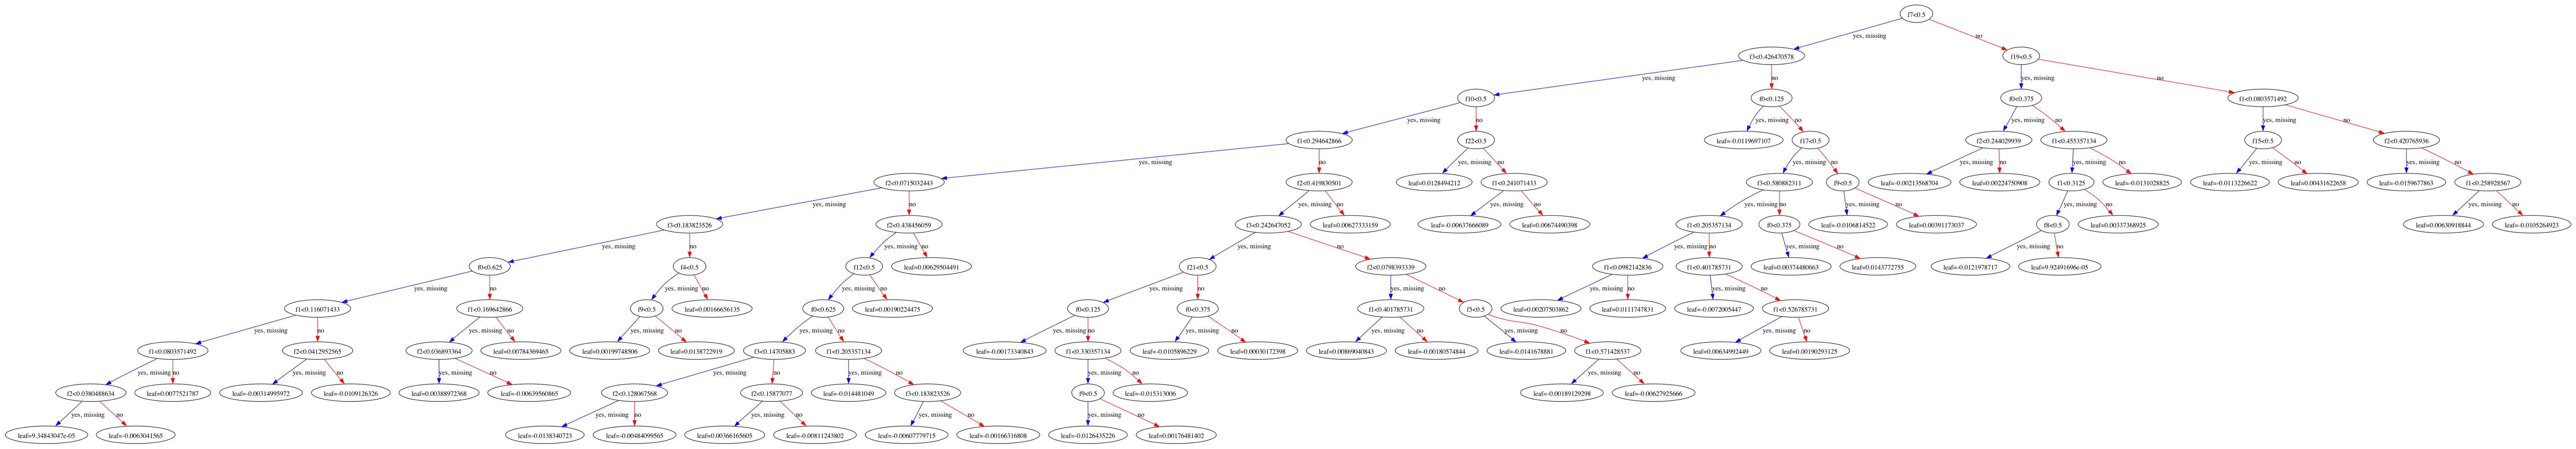

In [33]:
# max_depth=10 is too large to be plot here

from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 40))
plot_tree(XGB, num_trees=10, ax=ax)
plt.savefig('../results/xgb_boost_model_dtree.png',bbox_inches = 'tight')
plt.show()
# Double click on the graph to zoom in

# KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       209
           1       0.58      0.46      0.51        91

    accuracy                           0.73       300
   macro avg       0.68      0.66      0.66       300
weighted avg       0.72      0.73      0.72       300

Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.75665219 0.67434211 0.68949772 0.71714424 0.71714424 0.75665219
 0.59466667 0.70952831 0.68503119 0.67673628]

Final Average Accuracy of the model: 0.7


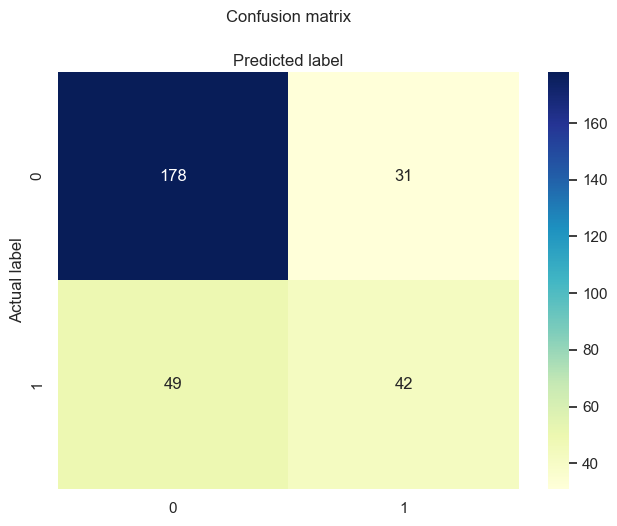

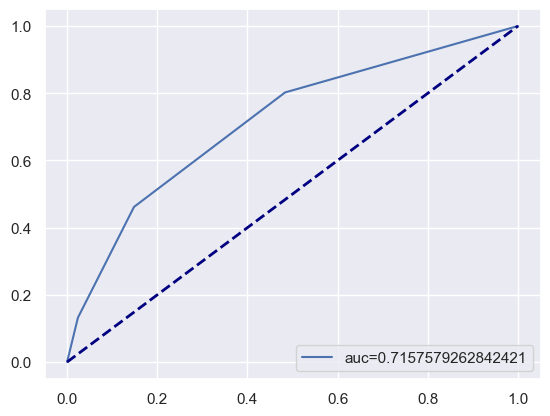

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics
KNN_model = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(KNN_model)
# Saving Model
filename = '../model/kneighbors_model_model_model.mdl'
pickle.dump(KNN_model, open(filename, 'wb'))
# Creating the model on Training Data
KNN=KNN_model.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
cnf_matrix=metrics.confusion_matrix(y_test, prediction) 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
kneighbors_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', kneighbors_acc)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../results/kneighbors_model_cnf_matrix.png',bbox_inches = 'tight') 
plt.show() 
y_pred_proba = KNN.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)

plt.savefig('../results/kneighbors_model_roc.png',bbox_inches = 'tight')
plt.show() 
# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# SVM

SVC(C=2, gamma=0.1, probability=True)
              precision    recall  f1-score   support

           0       0.78      0.87      0.83       209
           1       0.60      0.45      0.52        91

    accuracy                           0.74       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300

Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.73549151 0.74796273 0.68949772 0.71776316 0.73947368 0.75388863
 0.64497905 0.74796273 0.69909584 0.7511499 ]

Final Average Accuracy of the model: 0.72


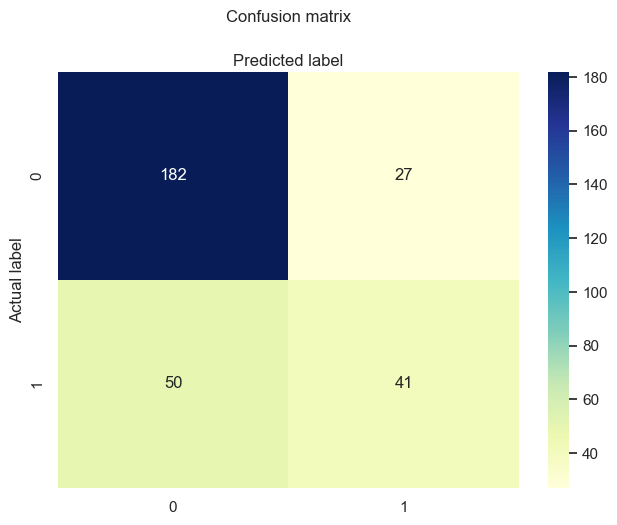

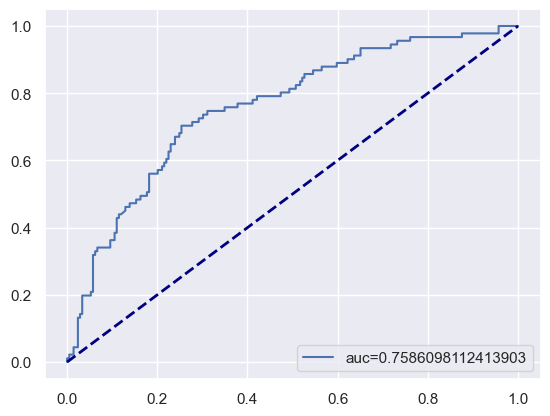

In [35]:
# Support Vector Machines(SVM)
from sklearn import svm
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics

svm_model= svm.SVC(C=2, kernel='rbf', gamma=0.1,probability=True)

# Printing all the parameters of KNN
print(svm_model)
# Saving Model
filename = '../model/svm_model_model_model.mdl'
pickle.dump(svm_model, open(filename, 'wb'))
# Creating the model on Training Data
SVM=svm_model.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
svm_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', svm_acc)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../results/svm_model_cnf_matrix.png',bbox_inches = 'tight') 
plt.show() 
y_pred_proba = SVM.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)

plt.savefig('../results/svm_model_roc.png',bbox_inches = 'tight')
plt.show() 
# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

# Naive Bayes

GaussianNB()
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       209
           1       0.54      0.63      0.58        91

    accuracy                           0.72       300
   macro avg       0.68      0.70      0.69       300
weighted avg       0.74      0.72      0.73       300

Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.74599729 0.67673628 0.70496324 0.71578348 0.71133388 0.81607143
 0.64319776 0.70857074 0.72798574 0.75498575]

Final Average Accuracy of the model: 0.72


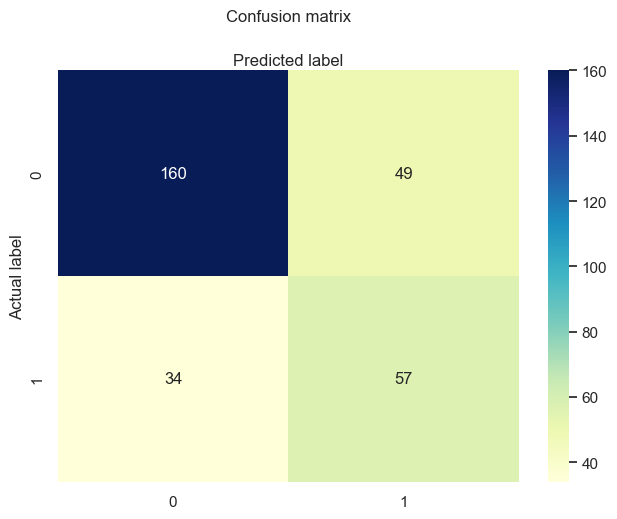

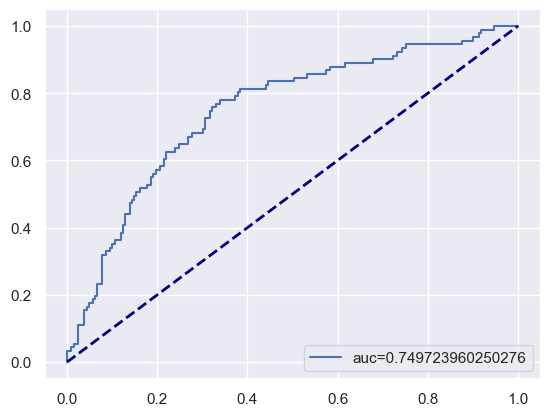

In [36]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
nb_model = GaussianNB()

# Printing all the parameters of Naive Bayes
print(nb_model)
# Saving Model
filename = '../model/naive_bayes_model_model.mdl'
pickle.dump(nb_model, open(filename, 'wb'))

NB=nb_model.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
naive_bayes_acc =  round(Accuracy_Values.mean(),2)
print('\nFinal Average Accuracy of the model:', naive_bayes_acc)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../results/naive_bayes_model_cnf_matrix.png',bbox_inches = 'tight') 
plt.show() 
y_pred_proba = NB.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)

plt.savefig('../results/naive_bayes_model_roc.png',bbox_inches = 'tight')
plt.show() 

# Comprasion Between Models

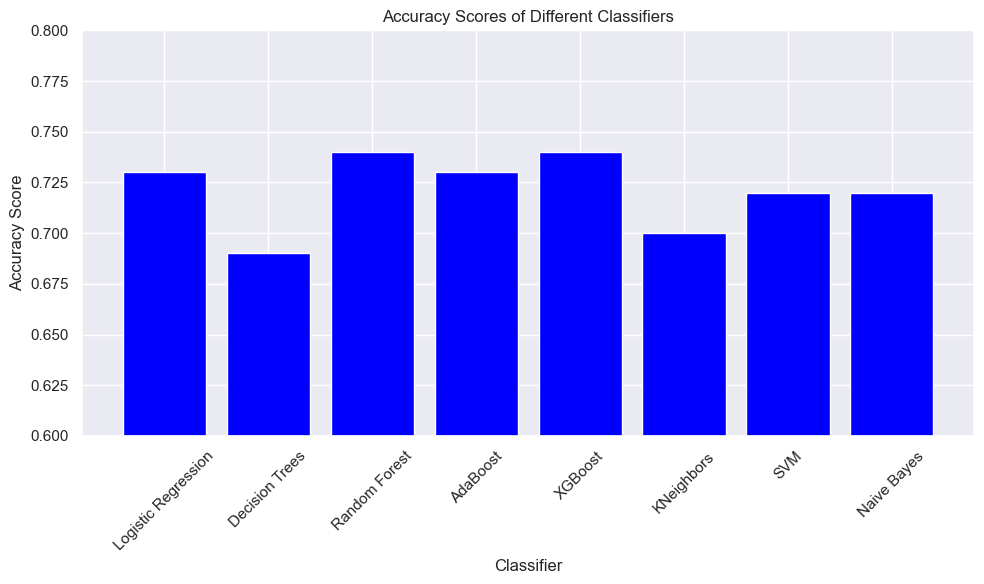

In [37]:
# Classifier names and their corresponding accuracy scores
classifiers = ['Logistic Regression', 'Decision Trees', 'Random Forest', 
               'AdaBoost', 'XGBoost', 'KNeighbors', 'SVM', 'Naive Bayes']
accuracy_scores = [logistic_regression_acc, dicision_trees_acc, random_forest_acc, ada_boost_acc, xgb_acc, kneighbors_acc,svm_acc, naive_bayes_acc]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracy_scores, color='blue')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Classifiers')
plt.ylim(0.6, 0.8)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.savefig('../results/final_model_acc_compare.png',bbox_inches = 'tight') 
plt.tight_layout()

# Display the chart
plt.show()